In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

(2139, 1024)
(2139, 1)
(709, 1024)
(709, 1)
(1024, 1024)
1024.000000000003
0.8976098617514459
(1024, 1024)


Text(0.5, 0, 'Dimensions')

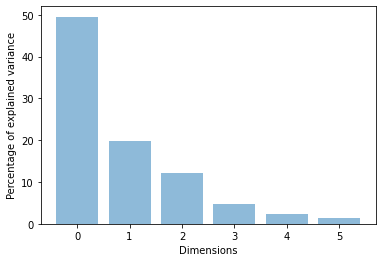

In [95]:
X_train = pd.read_csv('/content/drive/MyDrive/CKCD/Data/Data_train.csv')
y_train = pd.read_csv('/content/drive/MyDrive/CKCD/Data/TrainLabel.csv')
X_test = pd.read_csv('/content/drive/MyDrive/CKCD/Data/Data_test.csv') 
y_test = pd.read_csv('/content/drive/MyDrive/CKCD/Data/TestLabel.csv')

X_train = X_train.iloc[:,:].values
print(X_train.shape)
y_train = y_train.iloc[1:,:].values
print(y_train.shape)
X_test = X_test.iloc[:,:].values
print(X_test.shape)
y_test = y_test.iloc[1:,:].values
print(y_test.shape)


def standardized(X):
  X = (X - X.mean()) / X.std(ddof=0)
  return X

X_train = standardized(X_train)
X_test = standardized(X_test)
# print(X_train[0:5])
# print(X_test[0:5])

X_train_corr = (1 / len(X_train) * X_train.T.dot(X_train))
print(X_train_corr.shape)

u,s,v = np.linalg.svd(X_train_corr)
eig_values, eig_vectors = s, v.T


print(np.sum(eig_values))
print(np.sum(eig_values[0:6]/np.sum(eig_values)))
print(eig_vectors.shape)

explained_variance=(eig_values[0:6] / np.sum(eig_values))*100
plt.figure
plt.bar(range(len(eig_vectors[0:6])), explained_variance[0:6], alpha=0.5)
plt.ylabel('Percentage of explained variance')
plt.xlabel('Dimensions')

In [96]:
X_train_lower = X_train.dot(eig_vectors[:,0:6])
X_test_lower  = X_test.dot(eig_vectors[:,0:6])
print(X_train_lower.shape)

from sklearn.svm import SVC
model = SVC(kernel = 'rbf', random_state = 0)
model.fit(X_train_lower, y_train.ravel())
y_pred = model.predict(X_test_lower)

count = 0
for i in range(len(y_pred)):
  if y_pred[i] == y_test[i]:
    count += 1

accuracy = count/len(y_pred)
print(accuracy)

(2139, 6)
0.8124118476727785
